In [415]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# scaler 
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
#
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [416]:
df = pd.read_csv("BankRecords.csv")

EDA

In [417]:
df.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


In [418]:
df.describe()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

In [420]:
df.isna().sum()

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64

In [421]:
df["Education"].unique()

array(['Diploma', 'Degree', 'Masters'], dtype=object)

In [422]:
education_encoder = {
  "Diploma" : 1,
  "Degree" : 2,
  "Masters" : 3
}

df["Education"] = df["Education"].map(education_encoder)

In [423]:
binary_columns = ["Personal Loan", "Securities Account", "CD Account", "Online Banking", "CreditCard"]

df[binary_columns] = df[binary_columns].replace({"Yes": 1, "No": 0})

<Axes: xlabel='Age', ylabel='Count'>

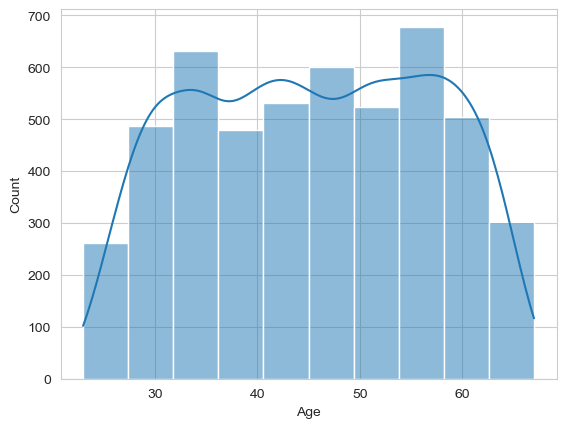

In [424]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Plot histograms for numerical variables
sns.histplot(data=df, x='Age', bins=10, kde=True)

<Axes: xlabel='Education', ylabel='count'>

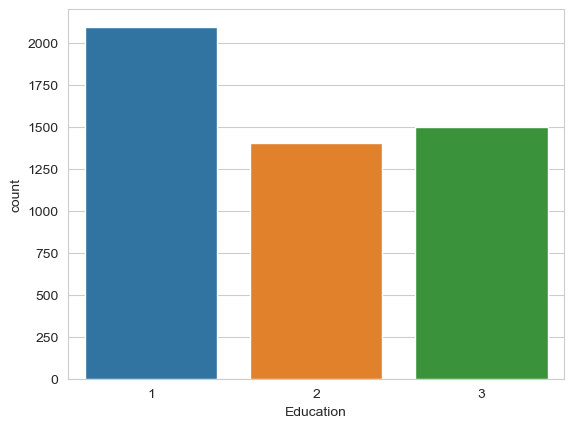

In [425]:
# Create a count plot for education level
sns.countplot(data=df, x='Education')


<Axes: ylabel='Experience(Years)'>

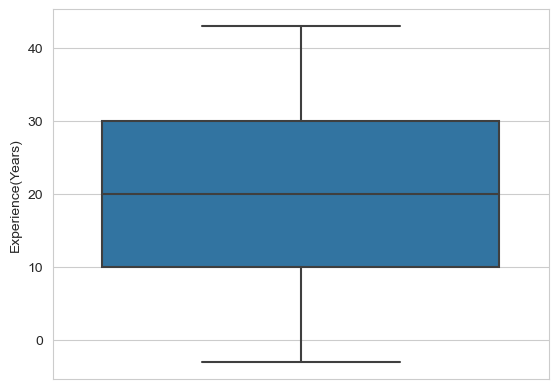

In [426]:
# Create a box plot for experience
sns.boxplot(data=df, y='Experience(Years)')

<Axes: xlabel='Education', ylabel="Income(Thousands's)">

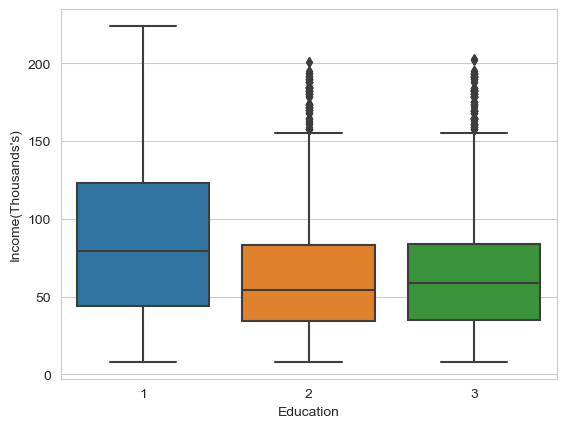

In [427]:
# Create a box plot for income by education level
sns.boxplot(data=df, x='Education', y="Income(Thousands's)")


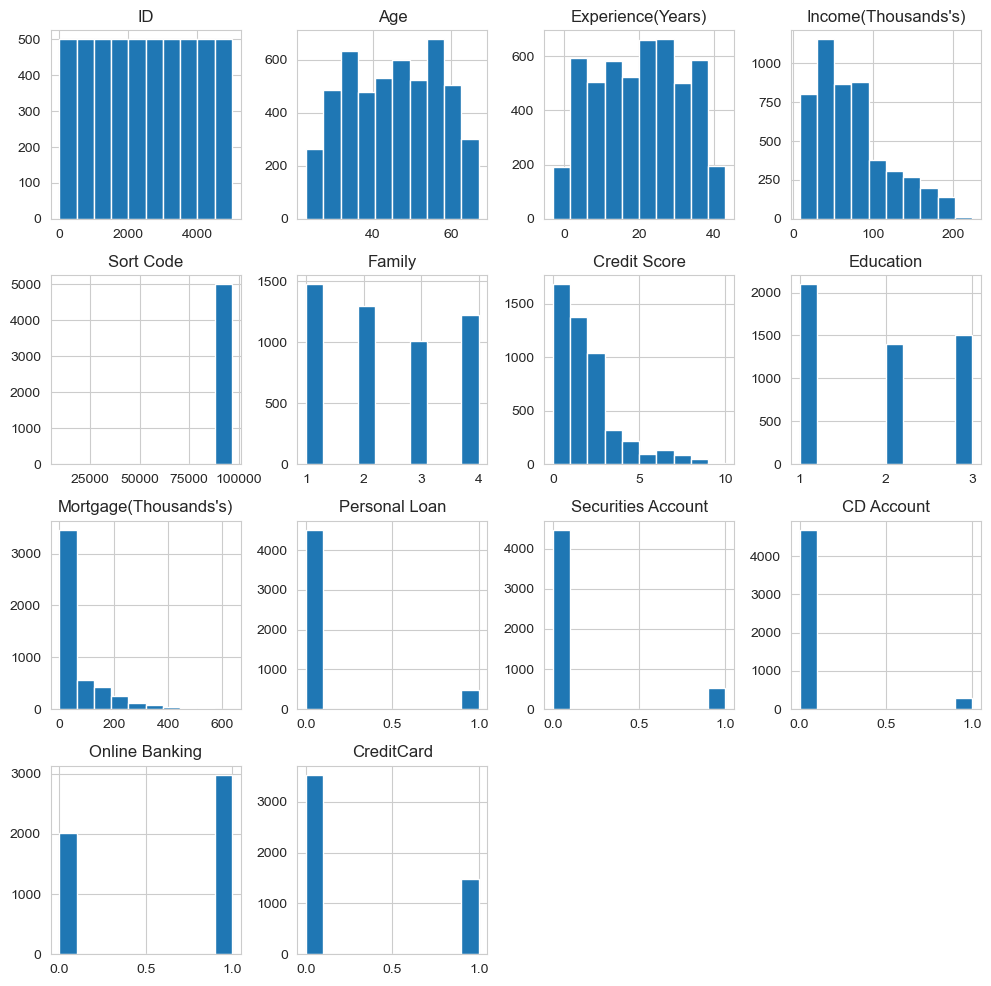

In [428]:
df.hist(figsize=(12,12))
plt.show()

c:\Users\rober\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


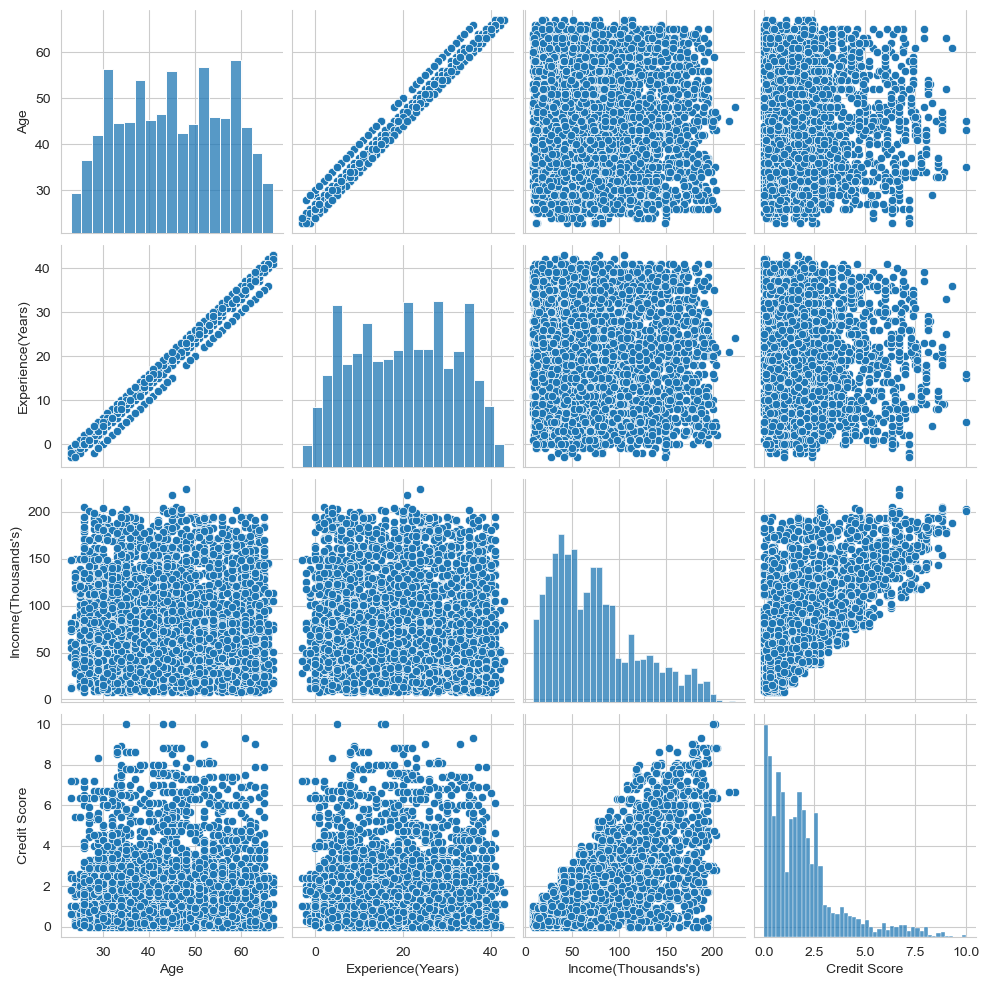

In [429]:
# Create a pair plot for numerical variables
sns.pairplot(df[["Age", "Experience(Years)","Income(Thousands's)", "Credit Score"]])


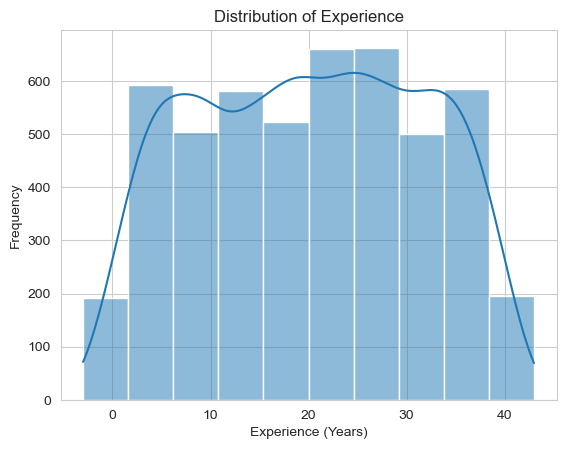

In [430]:
# Create a histogram for experience
sns.histplot(data=df, x='Experience(Years)', bins=10, kde=True)

# Add labels and title
plt.xlabel('Experience (Years)')
plt.ylabel('Frequency')
plt.title('Distribution of Experience')

# Show the plot
plt.show()


<Axes: >

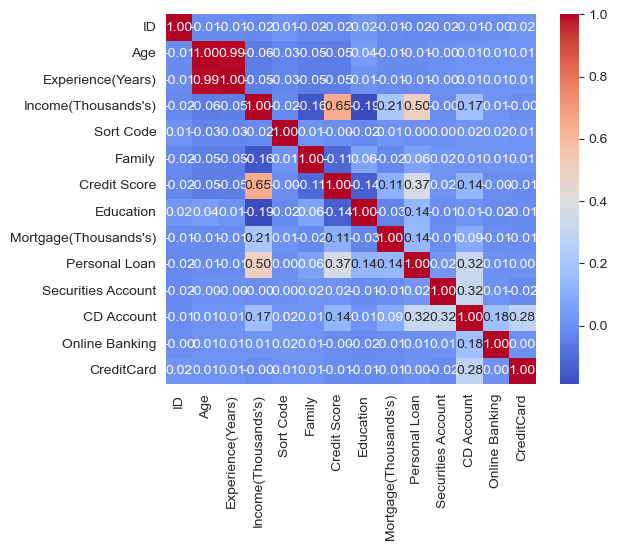

In [431]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
  
# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)


"Family","Credit Score", "Education",Mortgage(Thousands's)","Personal Loan", "CD Account"
"Age","Experience(Years)","Family","Credit Score", "Education",Mortgage(Thousands's)","Personal Loan", "CD Account"

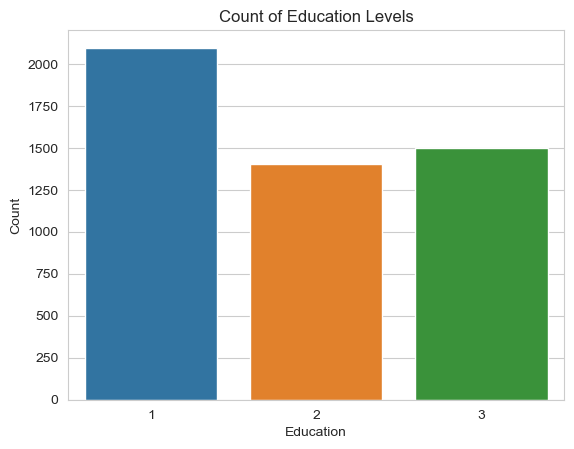

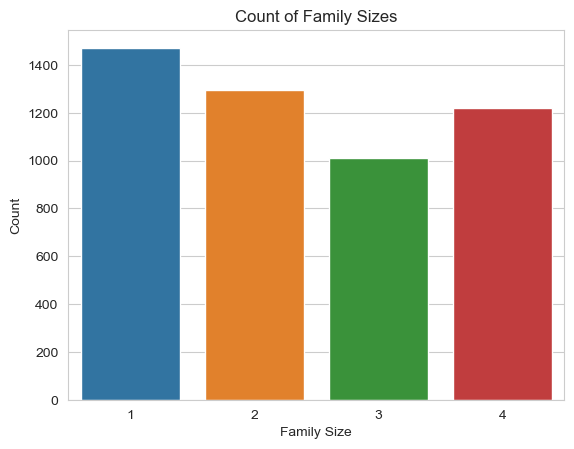

In [432]:
# Create a count plot for education level
sns.countplot(data=df, x="Education")
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Count of Education Levels')
plt.show()

# Create a count plot for family size
sns.countplot(data=df, x="Family")
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Count of Family Sizes')
plt.show()


In [433]:
# Calculate median experience for individuals with ages 23 to 29
median_exp_by_age = df.groupby("Age")["Experience(Years)"].median()

# Display median experience for each age group
print("Median experience by age:")
print(median_exp_by_age)


Median experience by age:
Age
23    -1.5
24    -1.0
25     0.0
26     1.0
27     2.0
28     3.0
29     4.0
30     5.0
31     5.0
32     7.0
33     8.0
34     9.0
35    10.0
36    11.0
37    12.0
38    13.0
39    14.0
40    15.0
41    16.0
42    17.0
43    18.0
44    19.0
45    20.0
46    21.0
47    22.0
48    23.0
49    24.0
50    25.0
51    26.0
52    27.0
53    28.0
54    29.0
55    30.0
56    31.0
57    32.0
58    33.0
59    34.0
60    35.0
61    36.0
62    37.0
63    38.0
64    39.0
65    40.0
66    41.0
67    42.0
Name: Experience(Years), dtype: float64


In [434]:
# Calculate median experience for individuals with ages 23 to 29
median_exp_by_age = df[df["Experience(Years)"] >= 0].groupby("Age")["Experience(Years)"].median()

# Display median experience for each age group
print("Median experience by age:")
print(median_exp_by_age)



Median experience by age:
Age
24     0.0
25     1.0
26     1.0
27     2.0
28     3.0
29     4.0
30     5.0
31     5.0
32     7.0
33     8.0
34     9.0
35    10.0
36    11.0
37    12.0
38    13.0
39    14.0
40    15.0
41    16.0
42    17.0
43    18.0
44    19.0
45    20.0
46    21.0
47    22.0
48    23.0
49    24.0
50    25.0
51    26.0
52    27.0
53    28.0
54    29.0
55    30.0
56    31.0
57    32.0
58    33.0
59    34.0
60    35.0
61    36.0
62    37.0
63    38.0
64    39.0
65    40.0
66    41.0
67    42.0
Name: Experience(Years), dtype: float64


In [435]:
# Filter the DataFrame to include only records where experience is larger than 0
filtered_df = df[(df["Experience(Years)"] <= 0) & (df["Income(Thousands's)"] > 0)]
# Count the number of records for each age group
age_group_counts = filtered_df.groupby("Age").size()

# Display the counts
print("Number of records for each age group where experience is smaller than 0:")
print(age_group_counts)


Number of records for each age group where experience is smaller than 0:
Age
23    12
24    28
25    35
26    29
27     8
28     1
29     4
30     1
dtype: int64


In [436]:
# Group the DataFrame by age and count the number of records for each age
age_group_counts = df.groupby("Age").size()

# Display the counts
print("Number of records for each age group:")
print(age_group_counts)


Number of records for each age group:
Age
23     12
24     28
25     53
26     78
27     91
28    103
29    123
30    136
31    125
32    120
33    120
34    134
35    151
36    107
37    106
38    115
39    133
40    125
41    136
42    126
43    149
44    121
45    127
46    127
47    113
48    118
49    115
50    138
51    129
52    145
53    112
54    143
55    125
56    135
57    132
58    143
59    132
60    127
61    122
62    123
63    108
64     78
65     80
66     24
67     12
dtype: int64


### Data Manipulation

In [437]:
# education_encoder = {
#   "Diploma" : 1,
#   "Degree" : 2,
#   "Masters" : 3
# }

# df["Education"] = df["Education"].map(education_encoder)

In [438]:
# binary_columns = ["Personal Loan", "Securities Account", "CD Account", "Online Banking", "CreditCard"]

# df[binary_columns] = df[binary_columns].replace({"Yes": 1, "No": 0})

Drop ID column 

In [439]:
df = df.drop(columns="ID")

In [440]:
df.head()

,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Select columns that will be scaled

In [441]:
numerical_columns = ["Experience(Years)", "Sort Code","Credit Score","Mortgage(Thousands's)"]

In [442]:
scaler = MinMaxScaler()
# scaler = PowerTransformer()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [443]:
df.head()

,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,25,0.086957,49,0.936527,4,0.16,1,0.0,0,1,0,0,0
1,45,0.478261,34,0.924872,3,0.15,1,0.0,0,1,0,0,0
2,39,0.391304,11,0.977892,1,0.10,1,0.0,0,0,0,0,0
3,35,0.260870,100,0.970931,1,0.27,2,0.0,0,0,0,0,0
4,35,0.239130,45,0.939080,4,0.10,2,0.0,0,0,0,0,1


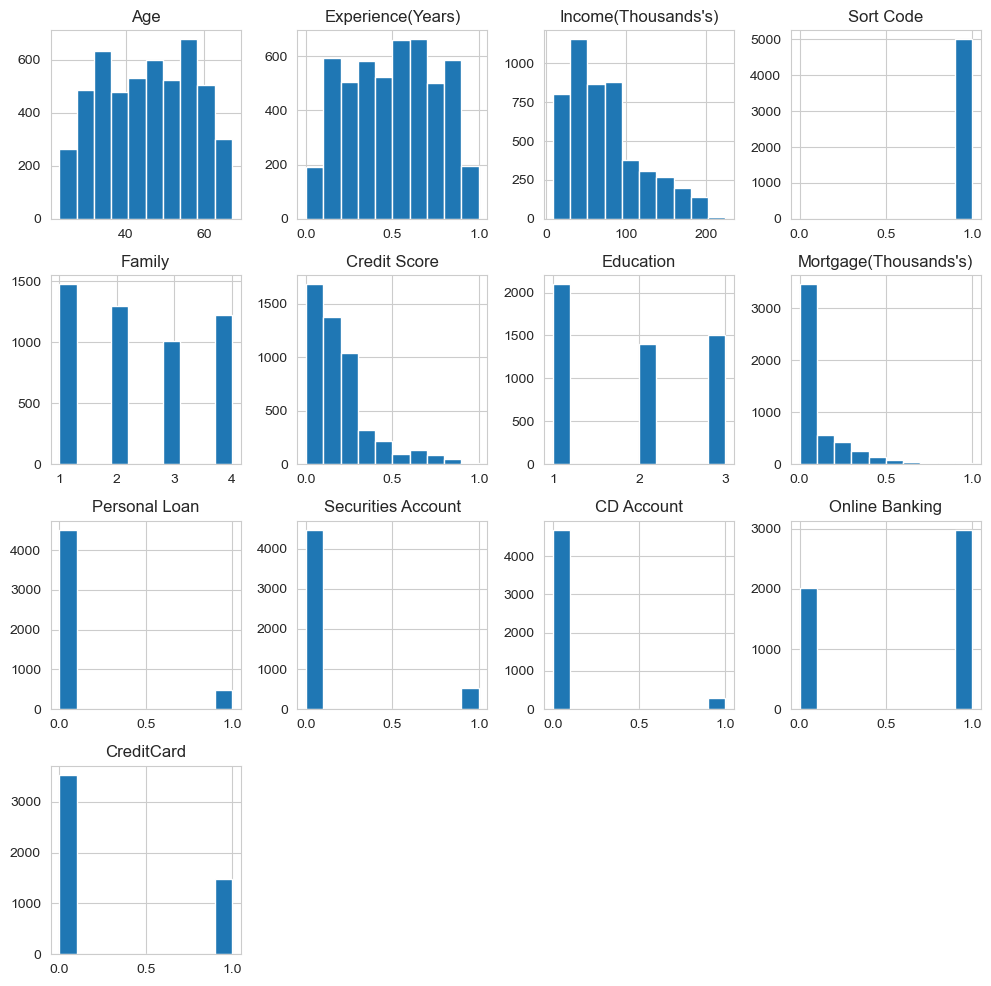

In [444]:
df.hist(figsize=(12,12))
plt.show()


In [ ]:



# X = df.drop(columns=["Income(Thousands's)"])  # Features
# X = df[["Age","Experience(Years)","Family","Credit Score", "Education","Mortgage(Thousands's)","Personal Loan", "CD Account"]]
X = df[["Family","Credit Score", "Education","Mortgage(Thousands's)","Personal Loan", "CD Account"]]
y = df["Income(Thousands's)"]  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)




In [446]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# List of models to try
models = {
    'Support Vector Regressor': SVR(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet()
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    # Print the MSE for each model
    print(f"{name}: Mean Squared Error = {mse}")

Support Vector Regressor: Mean Squared Error = 2173.095787464551
Decision Tree Regressor: Mean Squared Error = 615.2771337777777
Gradient Boosting Regressor: Mean Squared Error = 663.3903192055457
Ridge Regression: Mean Squared Error = 944.8914122541734
Lasso Regression: Mean Squared Error = 1000.0444369144054
ElasticNet Regression: Mean Squared Error = 1797.5546296710015


In [447]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [50, 100, 200],  # Number of trees in the forest
#     'max_depth': [None, 10, 20],       # Maximum depth of the trees
#     'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
#     'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
# }

# # Initialize the Random Forest Regressor
# rf = RandomForestRegressor(random_state=42)

# # Perform grid search to find the best hyperparameters
# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Use the best model for prediction
# best_rf = grid_search.best_estimator_
# y_pred = best_rf.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# print("Best Random Forest Regressor - Mean Squared Error:", mse)


In [448]:
best_params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor with specified parameters
model = RandomForestRegressor(**best_params)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict income values on the testing data
y_pred = model.predict(X_test)

Validating Testing Set

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Random Forest Regressor - Mean Squared Error:", mse)
print("Random Forest Regressor - Mean Absolute Error:", mae)
print("Random Forest Regressor - Root Mean Squared Error:", np.sqrt(mse))


Random Forest Regressor - Mean Squared Error: 357.41232551080424
Random Forest Regressor - Mean Absolute Error: 13.509467550793651
Random Forest Regressor - Root Mean Squared Error: 18.905351769031018


Validation Training Set

In [ ]:
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
print("Random Forest Regressor over training set - Mean Squared Error:", mse_train)
print("Random Forest Regressor over training set - Mean Absolute Error:", mae_train)
print("Random Forest Regressor over training set - Root Mean Squared Error:", np.sqrt(mse_train))

Random Forest Regressor over training set - Mean Squared Error: 68.73421976089146
Random Forest Regressor over training set - Mean Absolute Error: 5.7504695278832285
Random Forest Regressor over training set - Root Mean Squared Error: 8.290610337055497


### Neural Network

In [467]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras.optimizers 

# Define the neural network architecture
model = keras.Sequential([
    # layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu',kernel_initializer='he_uniform'),
    layers.Dense(16, activation='relu'),
    # layers.Dense(24, activation='relu'),
    layers.Dense(1, activation='linear')  # Output layer with 1 neuron for regression
])

opt = keras.optimizers.Adam()
model.compile(optimizer=opt, loss='mse', metrics=['mae'])
# Define early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model on the training data with early stopping
history = model.fit(X_train, y_train, epochs=500, batch_size=60, validation_split=0.4)
# history = model.fit(X_train, y_train, epochs=100, batch_size=60, validation_split=0.4, callbacks=[early_stopping])

# Evaluate the model on the testing data
loss_test, mae_test = model.evaluate(X_test, y_test)
loss_train, mae_train = model.evaluate(X_train, y_train)
print("Mean Squared Error Test:", loss_test)
print("Mean Absolute Error Test:", mae_test)
print("Root Mean Error Test:", np.sqrt(loss_test))
print("------")
print("Mean Squared Error Train:", loss_train)
print("Mean Absolute Error Train:", mae_train)
print("Root Mean Error Train:", np.sqrt(loss_train))


Epoch 1/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 8601.8467 - mae: 79.2322 - val_loss: 4979.9634 - val_mae: 55.5565
Epoch 2/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4923.0903 - mae: 53.9419 - val_loss: 3516.5576 - val_mae: 43.9592
Epoch 3/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3912.2793 - mae: 46.2337 - val_loss: 2654.0862 - val_mae: 38.4549
Epoch 4/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2966.1638 - mae: 40.8880 - val_loss: 2362.7627 - val_mae: 37.3849
Epoch 5/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2630.6619 - mae: 39.8030 - val_loss: 2322.2852 - val_mae: 37.7901
Epoch 6/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2576.5720 - mae: 39.6989 - val_loss: 2325.0942 - val_mae: 37.9737
Epoch 7/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2729.2507 - mae: 41.3225 - val_loss: 2328.7834 - val_mae: 38.1143
Epoch 8/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2537.4026 - mae: 39.6035 - val_loss: 2321.5105 - val_mae: 37.9826